<a href="https://colab.research.google.com/github/rencinj/my-event-bot/blob/main/EDA_2_session_8mar2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

...
Question 1 ->
Import the ds_salaries data into Jupiter Notebook and get an idea about the data  and explain its process
...

In [ ]:
#Solution ->
df = pd.read_csv('/content/ds_salaries.csv')
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


...
Question 2 ->
Get an idea about duplicates in the data and null value in the data
and treat them if neccessary



In [ ]:
#solution -->


In [ ]:

#Getting an idea about the duplicates in the data
df.duplicated().sum()

1171

In [ ]:
#Dropping the duplicates
df.drop_duplicates(inplace =True)

In [ ]:
#Getting an ideas about the duplicates in the data
df.duplicated().sum()

0

In [ ]:
#Getting an idea whether there are any null values in the data
df.isnull().sum().any()

False

In [ ]:
#False means that there are no NULL values in the data

In [ ]:
'''
Question 3->
Get an idea about the data types of the columns and comment whether they are in correct  data type or not

In [ ]:
#Solution ->

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


In [ ]:
'''
conclusions ->
All the columns are in correct data types as expected
'''

In [ ]:
'''
Question 4 ->
Perform statistical analysis on the data and comment on it
'''

In [ ]:
#solution
df.describe()


,work_year,salary,salary_in_usd,remote_ratio
count,2584.000000,2.584000e+03,2584.000000,2584.000000
mean,2022.301084,2.103653e+05,133409.280186,50.483746
std,0.749179,8.080375e+05,67136.837329,48.163707
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,9.000000e+04,84975.000000,0.000000
50%,2022.000000,1.346300e+05,130000.000000,50.000000
75%,2023.000000,1.825625e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [ ]:
'''
conclusions ->
(1) From the ' year ' column, we can say that we have the data from 2020 to 2023
(2) From the  ' salary ' and 'salary_in_usd ' columns, we can see that mean is significantly greater than median,
 implying that there are outliers in the right tail
(3) From the 'remote_ratio' , we can say that mean and median are approximately same,
implying that the data is not stewed
'''

In [ ]:
'''
Question 5 ->
Perform correlation analysis on the data and comment on it

'''

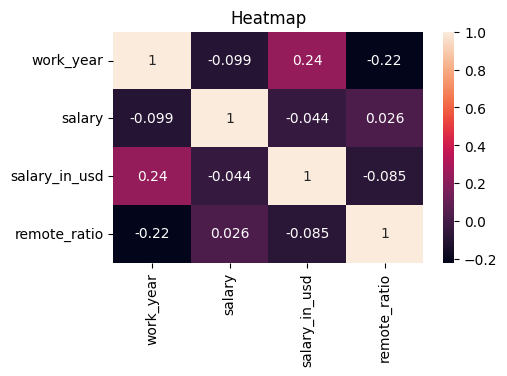

In [ ]:
#solutions ->
plt.figure(figsize = (5,3))
sns.heatmap(df.corr(numeric_only = True), annot = True)
plt.title('Heatmap')
plt.show()

In [ ]:
'''
conclusions ->
(1) salary_in_usd and work_year have a weak positive correlation
(2) 'work_year' and 'remote_ratio' have a weak negative correlation
(3) 'salary_in_usd' and 'remote_ratio' have a perfectly uncorrelated
'''

In [ ]:
'''
Question 6 ->
Find the number of unique job titles and display the top 5 most frequent job titles
'''


In [ ]:
#Solutions->


In [ ]:
#getting the number of unique jobs
print('Number of unique job titles: ', df['job_title'].nunique())

Number of unique job titles:  93


In [ ]:
#Getting count
df['job_title'].value_counts()

,count
job_title,
Data Engineer,598
Data Scientist,538
Data Analyst,396
Machine Learning Engineer,206
Analytics Engineer,91
...,...
Compliance Data Analyst,1
Deep Learning Researcher,1
Staff Data Analyst,1


In [ ]:
#Getting the top 5 most frequent jobs
df['job_title'].value_counts().head()

,count
job_title,
Data Engineer,598
Data Scientist,538
Data Analyst,396
Machine Learning Engineer,206
Analytics Engineer,91


In [ ]:
'''
Quedtio 7 ->
plot a histogram of the 'salary_in_usd' and comment on it
'''

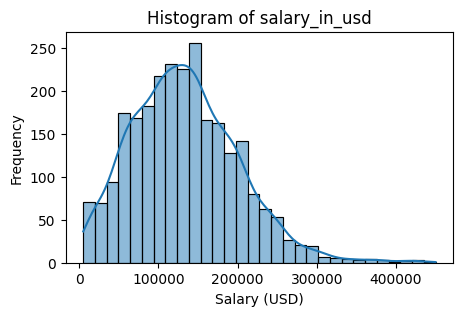

In [ ]:
#solutions
plt.figure(figsize = (5,3))
sns.histplot(x = df['salary_in_usd'],bins =30,kde = True)
plt.title('Histogram of salary_in_usd')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#From the above plot, we can say that the data is showing approx normally distribution
#with a long right tail implying that there are outliers in right tail

In [ ]:
'''
Question 8 ->
Display the avaerage salary for each job title and comment on it
'''

In [ ]:
#solutions ->
df.groupby('job_title')['salary_in_usd'].mean().round(2).sort_values(ascending = False)

,salary_in_usd
job_title,
Data Science Tech Lead,375000.00
Cloud Data Architect,250000.00
Data Lead,212500.00
Data Analytics Lead,211254.50
Principal Data Scientist,198171.12
...,...
Autonomous Vehicle Technician,26277.50
3D Computer Vision Researcher,21352.25
Staff Data Analyst,15000.00


In [ ]:
'''
Question 9->
Display the average salary for each job title and sort it in descending order (without groupby)
'''

In [ ]:
#solution->

salary_sum = {}
count = {}


for _, row in df.iterrows():
    job = row['job_title'] #indented this line
    salary = row['salary_in_usd'] #indented this line

    if job in salary_sum:
        salary_sum[job] += salary #indented this line
        count[job]+=1 #indented this line
    else:
        salary_sum[job] = salary #indented this line
        count[job] =1 #indented this line

    #calculating the average #indented this line
    avg_salaries ={job : (salary_sum[job]/ count[job]) for job in salary_sum} #indented this line, and fixed the variable name to salary_sum

    #converting to dataframe #indented this line
    avg_salary_df =pd.DataFrame(avg_salaries.items(),columns= ['Job Title','Avg Salaries']) #indented this line, and fixed the method call to items()
    print(avg_salary_df.sort_values(by = 'Avg Salaries',ascending = False)) #indented this line, and fixed the column name to 'Avg Salaries'

Streaming output truncated to the last 5000 lines.

[89 rows x 2 columns]
                 Job Title  Avg Salaries
75  Data Science Tech Lead      375000.0
86    Cloud Data Architect      250000.0
64               Data Lead      212500.0
25            Head of Data      207843.2
79  Marketing Data Analyst      200000.0
..                     ...           ...
63     Data Analytics Lead       17509.0
22      Staff Data Analyst       15000.0
77     Cloud Data Engineer       12608.0
81  Product Data Scientist        8000.0
80      Power BI Developer        5409.0

[89 rows x 2 columns]
                 Job Title  Avg Salaries
75  Data Science Tech Lead      375000.0
86    Cloud Data Architect      250000.0
64               Data Lead      212500.0
25            Head of Data      207843.2
79  Marketing Data Analyst      200000.0
..                     ...           ...
63     Data Analytics Lead       17509.0
22      Staff Data Analyst       15000.0
77     Cloud Data Engineer       12608.0
8

In [ ]:
#Doubt ->
help(df.iterrows)


Help on method iterrows in module pandas.core.frame:

iterrows() -> 'Iterable[tuple[Hashable, Series]]' method of pandas.core.frame.DataFrame instance
    Iterate over DataFrame rows as (index, Series) pairs.
    
    Yields
    ------
    index : label or tuple of label
        The index of the row. A tuple for a `MultiIndex`.
    data : Series
        The data of the row as a Series.
    
    See Also
    --------
    DataFrame.itertuples : Iterate over DataFrame rows as namedtuples of the values.
    DataFrame.items : Iterate over (column name, Series) pairs.
    
    Notes
    -----
    1. Because ``iterrows`` returns a Series for each row,
       it does **not** preserve dtypes across the rows (dtypes are
       preserved across columns for DataFrames).
    
       To preserve dtypes while iterating over the rows, it is better
       to use :meth:`itertuples` which returns namedtuples of the values
       and which is generally faster than ``iterrows``.
    
    2. You should **ne

In [ ]:
'''
Question 10 ->
plot 'company  Location ' and 'Average salary'
'''

In [ ]:
#solutions ->

In [ ]:

#Getting th column names
print(df.columns)


Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [ ]:
#Data
print(df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False))


company_location
IL    271446.500000
PR    167500.000000
US    152374.791602
RU    140333.333333
CA    130572.759036
          ...      
VN     12000.000000
AL     10000.000000
MA     10000.000000
BO      7500.000000
MK      6304.000000
Name: salary_in_usd, Length: 72, dtype: float64


In [ ]:
#solution ->
a = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending = False).head(10)

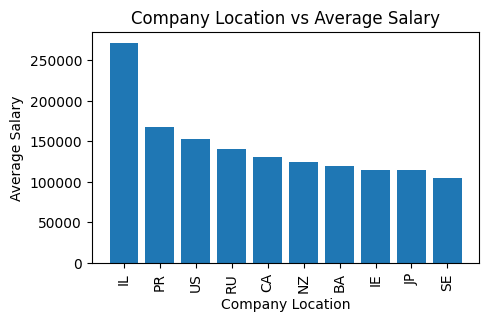

In [ ]:
plt.figure(figsize = (5,3))
plt.bar(a.index,a.values)
plt.xlabel('Company Location')
plt.ylabel('Average Salary')
plt.title('Company Location vs Average Salary')
plt.xticks(rotation = 90)
plt.show()